# Downloads and Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Raising funds

In [2]:
print(os.getcwd())

/content


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/weball20.txt', sep='|', header=None)
print(df)

             0                          1  2   3    4           5          6   \
0     H8AK00132             SHEIN, DIMITRI  C   1  DEM        0.00       0.00   
1     H6AK00045            YOUNG, DONALD E  I   2  REP  1950289.86  138304.94   
2     H8AK01031        NELSON, THOMAS JOHN  C   2  REP        0.00       0.00   
3     H8AK00140              GALVIN, ALYSE  C   3  IND  5253251.54   60024.76   
4     H0AL01097            AVERHART, JAMES  O   1  DEM    80094.95       0.00   
...         ...                        ... ..  ..  ...         ...        ...   
3984  S0WY00186  HOLTHUS, ROLLAND SCOTT MR  O   2  REP     4291.94       0.00   
3985  S4WY00097           HARDY, CHARLES E  C   2  REP        0.00       0.00   
3986  S4WY00147              MILLER, BRYAN  O   2  REP    50876.53    3685.02   
3987  S6WY00068           BARRASSO, JOHN A  I   2  REP  1008180.71   28538.06   
3988  S6WY00126            ENZI, MICHAEL B  I   2  REP   141784.99       0.00   

              7        8   

In [4]:
df1 = df.drop(columns=[3,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,24,25,26,27,28,29])

State and district are in column 19 and 20 respectively. Contributions are in column 26, 27 respectively.
The whole dataset correspond to a year.

In [5]:
df1 = df1.rename(columns = {0:"ID"})
df1 = df1.rename(columns = {1:"Name"}) 
df1 = df1.rename(columns = {2:"I/C"})
df1 = df1.rename(columns = {4:"Party"}) 
df1 = df1.rename(columns = {5:"$$"})
df1 = df1.rename(columns = {18:"State"}) 
df1 = df1.rename(columns = {23:"Status"})

In [6]:
top25 = df1[df1["$$"] > 2]
print(top25.sort_values("$$", ascending=False).head(25))

             ID                            Name I/C Party            $$ State  \
3303  P20003851       ELGAR, MISS BETSY PAULINE   C   CON  4.824618e+09    00   
3232  P00014530           BLOOMBERG, MICHAEL R.   C   DEM  1.124593e+09    00   
3250  P80000722              BIDEN, JOSEPH R JR   C   DEM  1.074180e+09    00   
3295  P80001571                TRUMP, DONALD J.   I   REP  7.443502e+08    00   
3251  P80003205                MERCER, LEE L JR   C   DEM  6.400000e+08    00   
3228  P00012716                     STEYER, TOM   C   DEM  3.530420e+08    00   
3246  P60007168                SANDERS, BERNARD   C   DEM  2.189070e+08    00   
3521  S8GA00180             OSSOFF, T. JONATHAN   C   DEM  1.561465e+08    GA   
3860  S0SC00289                 HARRISON, JAIME   C   DEM  1.326857e+08    SC   
3204  P00009621               WARREN, ELIZABETH   C   DEM  1.313681e+08    00   
3516  S0GA00559                WARNOCK, RAPHAEL   C   DEM  1.253591e+08    GA   
3862  S0SC00149             

# Districting

In [7]:
! pip install geopandas folium -U matplotlib mapclassify contextily
! pip install folium -U
! pip install -I matplotlib==3.1.1
import matplotlib.pyplot as plt
import geopandas
import contextily as cx
from shapely.geometry import Point

  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached kiwisolver-1.4.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pyparsing-3.0.8-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which

We inspect the districting plan proposed by both the Democratic and Republican. Note that Shapefiles are a collection of files, instead of just one single file.

In [8]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/Data/ny_2020_congress_letters_draft_2021-09-15.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('nydem2020')
ny_dem = geopandas.read_file('nydem2020')

with ZipFile('/content/drive/MyDrive/Data/ny_2020_congress_names_draft_2021-09-15.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('nyrepub2020')
ny_repub = geopandas.read_file('nyrepub2020')

In [9]:
print(len(ny_dem.columns)) 
for col_name in ny_dem.columns:
  print(col_name, end=' ')

23
ID AREA DISTRICT MEMBERS LOCKED NAME POPULATION CVAP_1519_ CVAP_15191 CVAP_15192 CVAP_15193 CVAP_15194 IDEAL_VALU DEVIATION F_DEVIATIO F_CVAP_151 F_CVAP_152 F_CVAP_153 F_CVAP_154 F_CVAP_155 MULTIPLE_F DISTRICT_L geometry 

Explore the different styles available in Pyplot.

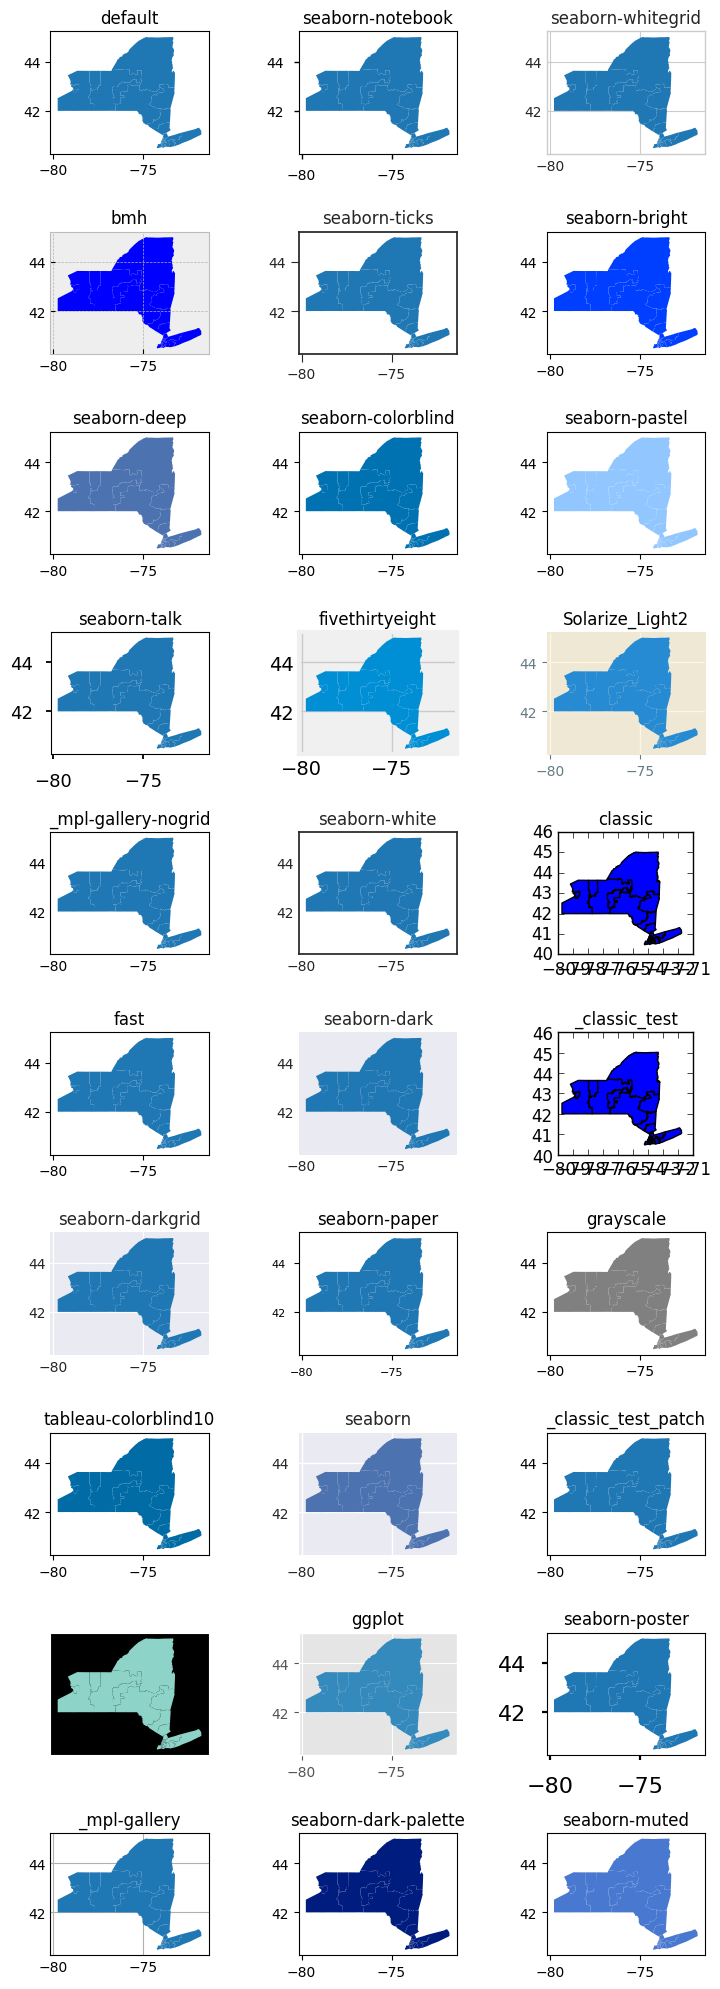

In [10]:
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ny_dem.plot(ax=ax)
    ax.set_title(style)

The last column is the geometry column. We use iat to extract one of its entry (a district) and then inspect it.

In [11]:
geom_cd1 = ny_dem.iat[0,22]
print('type of geom_cd1 is', geom_cd1.geom_type) 
print('Area of CD1 is', geom_cd1.area) 
print('Length of CD1 is', geom_cd1.length) 
print(geom_cd1)

type of geom_cd1 is Polygon
Area of CD1 is 0.49612352814600036
Length of CD1 is 4.547818041054305
POLYGON ((-72.98406 40.966118, -72.981785 40.966274, -72.979979 40.966373, -72.974131 40.966609, -72.969243 40.966884, -72.967459 40.966758, -72.957258 40.966053, -72.95487 40.966278, -72.95075 40.966018, -72.937822 40.964441, -72.937748 40.964432, -72.933612 40.963934, -72.932042 40.963508, -72.925725 40.962786, -72.924922 40.962883, -72.918426 40.962658, -72.915899 40.962642, -72.913837 40.962467, -72.910573 40.962532, -72.907004 40.962693, -72.904921 40.962787, -72.902906 40.962657, -72.901231 40.962713, -72.899 40.962787, -72.896122 40.962547, -72.893369 40.962692, -72.886876 40.963108, -72.88377 40.963489, -72.881818 40.963589, -72.880055 40.963568, -72.879056 40.963667, -72.871358 40.964434, -72.868282 40.965316, -72.867031 40.965491, -72.866516 40.964173, -72.865994 40.962832, -72.865048 40.962948, -72.86572 40.964289, -72.865788 40.965458, -72.864446 40.965522, -72.864407 40.965377

We now plot and compare the plans from the respective party.

Text(0.5, 1, 'Republican Districting')

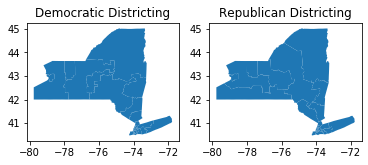

In [12]:
ax1 = plt.subplot(1, 2, 1)
ny_dem.plot(ax=ax1)
ax1.set_title("Democratic Districting")
ax2 = plt.subplot(1, 2, 2)
ny_repub.plot(ax=ax2)
ax2.set_title("Republican Districting")

Text(0.5, 1, 'Districting Plan for Both Parties')

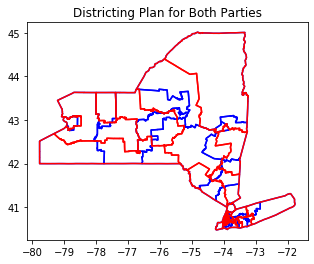

In [13]:
fig, ax = plt.subplots()
ny_dem.boundary.plot(ax=ax, color='blue')
ny_repub.boundary.plot(ax=ax, color='red')
ax.set_title('Districting Plan for Both Parties')

Before calculating the area, we should convert Geographic Coordinate Systems (GCS) to Coordinate Reference Systems (CRS) which represent actual ground distances. Below are some very common projections.

*   WGS84 Latitude/Longitude: "EPSG:4326"

*   UTM Zones (North): "EPSG:32633"

*   UTM Zones (South): "EPSG:32733"

In [14]:
ny_dem["area"] = ny_dem.to_crs("EPSG:4326").area
ny_dem.explore("area", legend=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [15]:
# Check if a location is within another
location = Point(-73.123019144744, 40.91214434980682)
for i in range(len(ny_dem)):
  geom_cd = ny_dem.iat[i,22]
  if (location.within(geom_cd)):
    print('My CD is congressional district', ny_dem.loc[i, "ID"])

My CD is congressional district 3


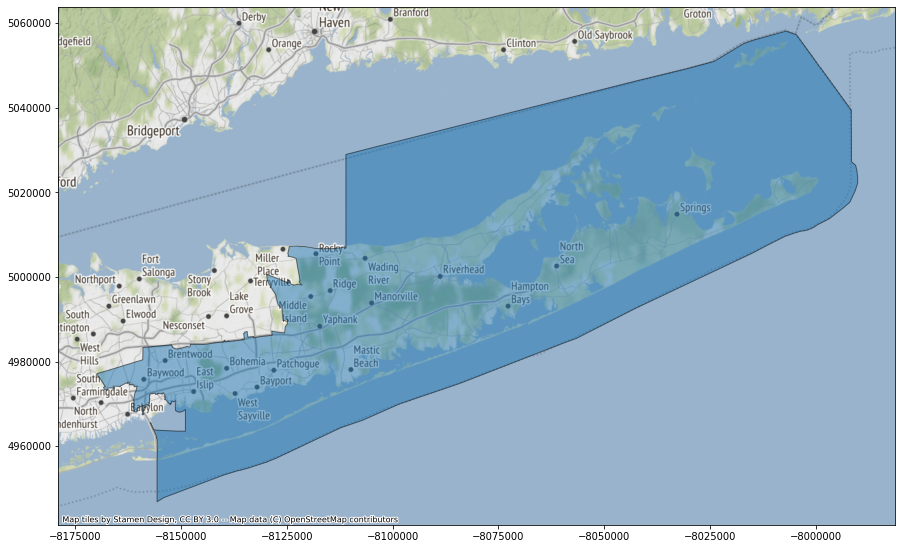

In [16]:
li_cd = ny_dem.loc[0:0, :]
li_cd = li_cd.to_crs(epsg=3857)
lx = li_cd.plot(figsize=(15, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(lx, crs=li_cd.crs)
plt.show()

NY coordinate system is  epsg:4269
New NY cordinate system is  epsg:3857


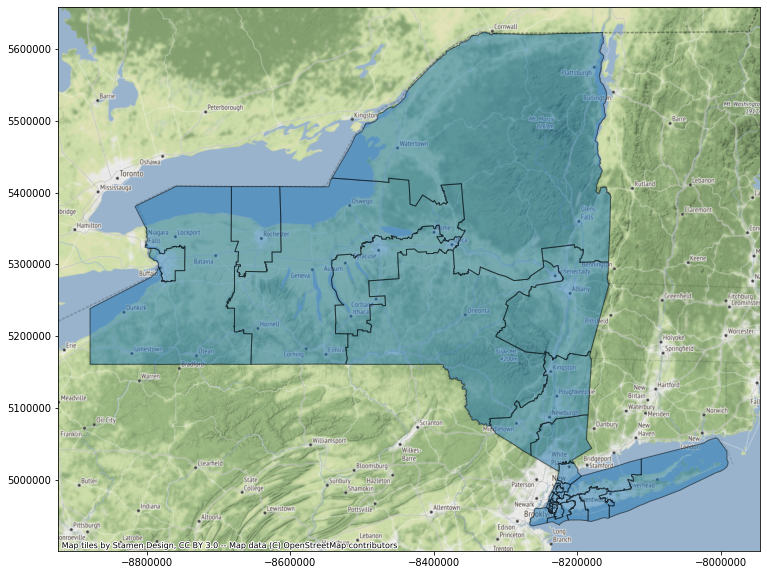

In [17]:
print('NY coordinate system is ', ny_dem.crs)
ny_dem_wm = ny_dem.to_crs(epsg=3857)
print('New NY cordinate system is ', ny_dem_wm.crs)
lx = ny_dem_wm.plot(figsize=(15, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(lx, crs=ny_dem_wm.crs)
plt.show()

# Survey data

American National Election Studies (ANES) is a survey on politcal preference.

In [18]:
anes = pd.read_csv("/content/drive/MyDrive/Data/anes_timeseries_2016_rawdata.txt", sep='|', header='infer', low_memory=False)

In [19]:
anes.head()

version  V160001  V160001_orig  V160101  V160101f  \
0  ANES2016TimeSeries_20190904        1        300001   0.8270    0.8877   
1  ANES2016TimeSeries_20190904        2        300002   1.0806    1.1605   
2  ANES2016TimeSeries_20190904        3        300003   0.3878    0.4161   
3  ANES2016TimeSeries_20190904        4        300004   0.3596    0.3852   
4  ANES2016TimeSeries_20190904        5        300006   0.6470    0.6931   

   V160101w  V160102  V160102f  V160102w  V160201  ...  \
0       0.0   0.8420    0.9271       0.0      121  ...   
1       0.0   1.0133    1.0841       0.0      123  ...   
2       0.0   0.3672    0.3985       0.0      121  ...   
3       0.0   0.3663    0.4183       0.0      118  ...   
4       0.0   0.6463    0.7262       0.0      113  ...   

                                V168519  V168520                  V168521  \
0  Garret Graves                               1  -1. Inap                  
1  Stephen A. 'Steve' Womack                   1  -1. Inap                  
2  Steven McCarty Palazzo                      1  -1. Inap                  
3  Marsha Blackburn                            2  -1. Inap                  
4  Bill Johnson                                1  -1. Inap                  

   V168522       V168523  V168524              V168525  V168526  \
0       -1  -1. Inap           81  -1. Inap                  -1   
1       -1  -1. Inap           82  -1. Inap                  -1   
2       -1  -1. Inap           82  -1. Inap                  -1   
3       -1  -1. Inap           82  -1. Inap                  -1   
4       -1  -1. Inap           82  -1. Inap                  -1   

                       V168527  V168528  
0  -1. Inap                          -1  
1  -1. Inap                          -1  
2  -1. Inap                          -1  
3  -1. Inap                          -1  
4  -1. Inap                          -1  

[5 rows x 1842 columns]

Each column starting with V is an election variable encoding a response to a question. Use the codebook to interpret them.

In [20]:
anes2 = anes.iloc[:,[1,30,63,128,129,137,138,170,212,217,223,367,374]].copy()
print(anes2)
for col_name in anes2.columns:
  print(col_name)

      V160001 V161010e  V161031  V161086  V161087  V161095  V161096  V161126  \
0           1       LA        2        0       85        0       70       99   
1           2       AR        2        0       85       15       85        5   
2           3       MS       -1       50       60       50       50       99   
3           4       TN       -1        0       60       30       70       99   
4           5       OH        3       15        0       70       40        4   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4265     5086       VA        1       86        3       98       40       99   
4266     5087       VA        2       50      100       50      100        4   
4267     5088       GA       -1        0       86       50       51        4   
4268     5089       NC        1       85        0       85       16        6   
4269     5090       MO        1       60       40       30       70       99   

      V161155  V161159  V161165  V16126

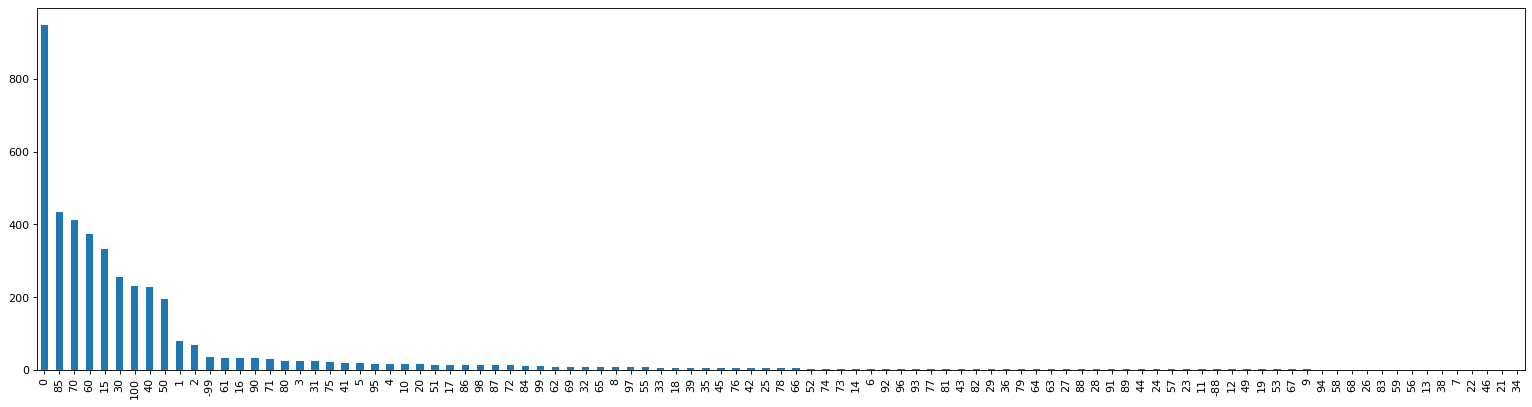

In [21]:
plt.figure(figsize=(24, 6), dpi=80)
anes2['V161086'].value_counts().plot(kind='bar')

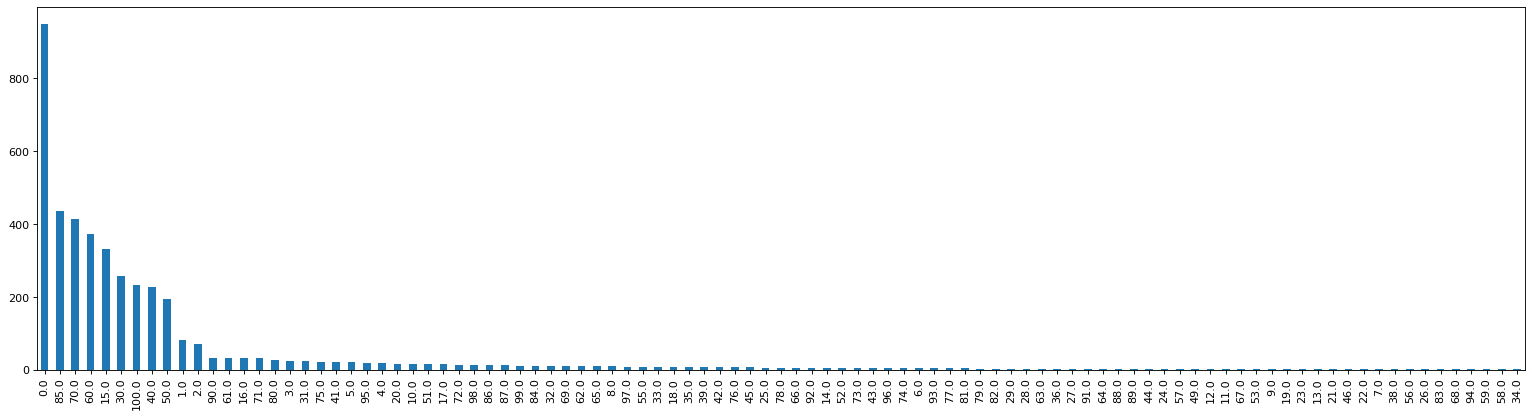

In [22]:
anes2['DemCand_Feel'] = anes2['V161086'].replace([-88,-89,-99], np.nan)

plt.figure(figsize=(24, 6), dpi=80)
anes2['DemCand_Feel'].value_counts().plot(kind='bar')

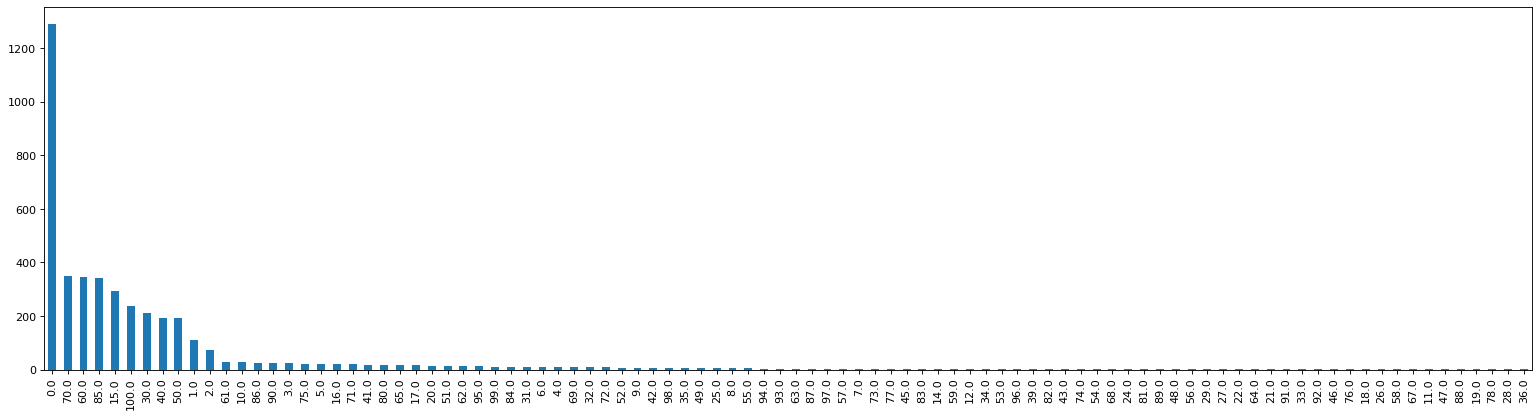

In [23]:
anes2['RepCand_Feel'] = anes2['V161087'].replace([-88,-89,-99], np.nan)

plt.figure(figsize=(24, 6), dpi=80)
anes2['RepCand_Feel'].value_counts().plot(kind='bar')

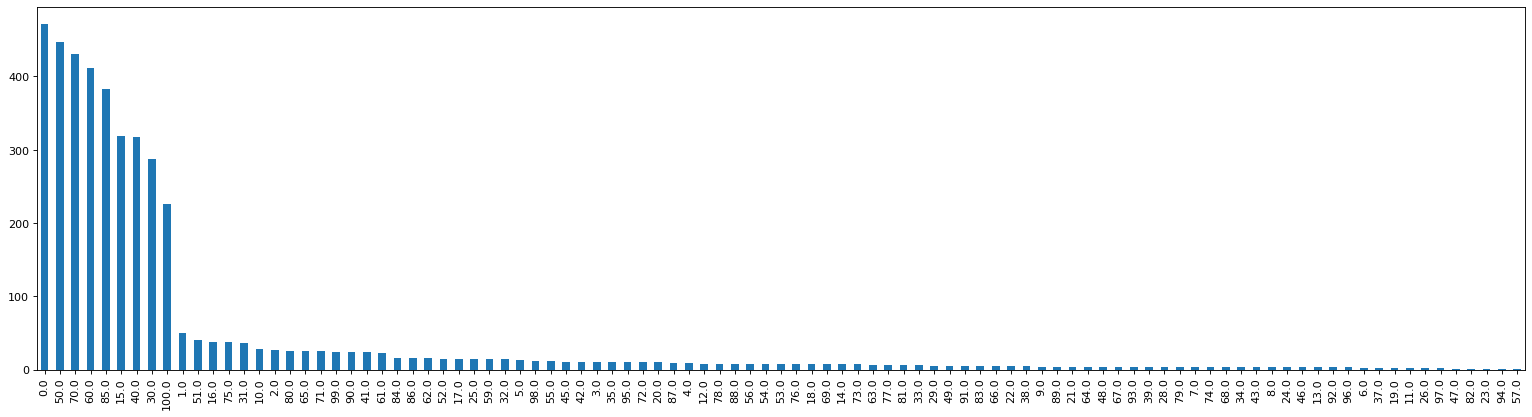

In [24]:
anes2['DemParty_Feel'] = anes2['V161095'].replace([-88,-89,-99], np.nan)

plt.figure(figsize=(24, 6), dpi=80)
anes2['DemParty_Feel'].value_counts().plot(kind='bar')

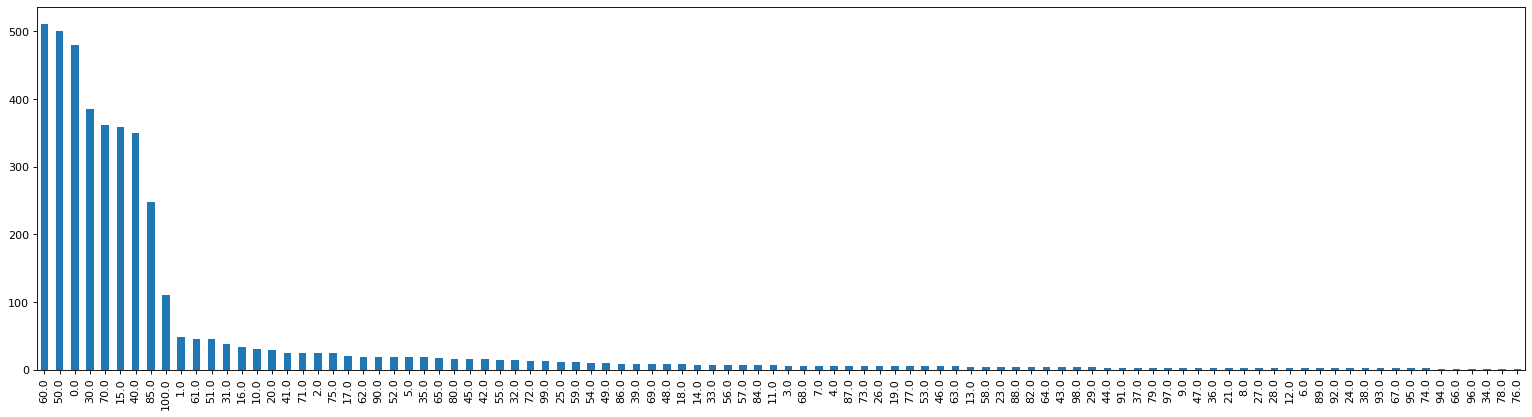

In [25]:
anes2['RepParty_Feel'] = anes2['V161096'].replace([-88,-89,-99], np.nan)

plt.figure(figsize=(24, 6), dpi=80)
anes2['RepParty_Feel'].value_counts().plot(kind='bar')

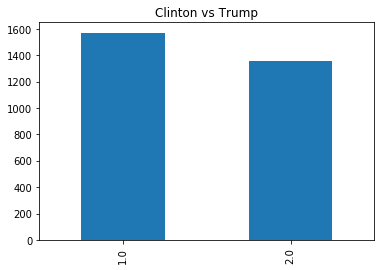

In [26]:
anes2['V161031'].value_counts().plot(kind='bar')
# Notice we only are looking at Clinton and Trump supporters!
anes2['Pres_Choice'] = anes2['V161031'].replace([3,4,5,6,7,8,-1,-8,-9], np.nan)
anes2['Pres_Choice'].value_counts().plot(kind='bar', title='Clinton vs Trump')

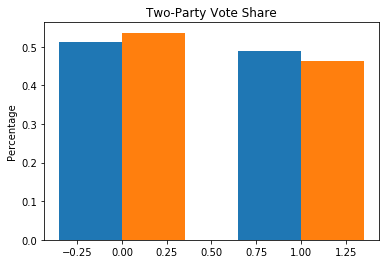

In [35]:
anes2['Pres_Choice_Bin'] = anes2['Pres_Choice'].replace([2.0], 0.0)
# Trump = 0, Clinton = 1
labels = ("Clinton", "Trump")
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x-width/2, height=(48.18/(48.18+46.09), 46.09/(48.18+46.09)), width=width)
ax.bar(x+width/2, height=anes2['Pres_Choice_Bin'].value_counts(normalize=True), width=width)

ax.set_ylabel('Percentage')
ax.set_title('Two-Party Vote Share')
ax.set_xticks(x, labels)

In [36]:
# recode ideology and education
anes2['Ideology'] = anes2['V161126'].replace([-8,-9,99], np.nan)
anes2['Education'] = anes2['V161270'].replace([-9,90,95], np.nan)

In [37]:
anes3 = anes2.iloc[:, [1,13,14,15,16,17,18,19,20]]
crosstab1 = pd.crosstab(anes3['Ideology'], anes3['Pres_Choice_Bin'])
print(crosstab1)

Pres_Choice_Bin  0.0  1.0
Ideology                 
1.0                5  113
2.0                9  413
3.0               28  245
4.0              225  318
5.0              234   88
6.0              521   36
7.0              132    8


We can try different plots to visualise the relationship between a number of variables.

[Text(0.5, 1.0, 'Feelings Shaded by Ideology')]

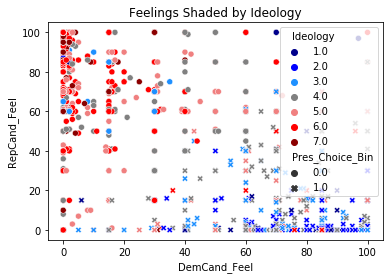

In [40]:
# Scatterplot shaded with ideology
sns.scatterplot(x='DemCand_Feel',
                y='RepCand_Feel',
                data=anes3,
                style='Pres_Choice_Bin',
                hue='Ideology',
                palette=['darkblue','blue','dodgerblue','gray','lightcoral','red','darkred']).set(title='Feelings Shaded by Ideology')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3426767f50>,
      dtype=object)

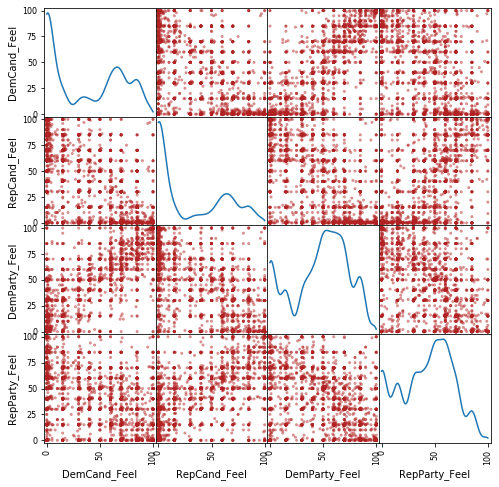

In [39]:
# Subset for feeling thermometer variables
anes4 = anes3.iloc[:,1:5]
# Create scatter matrix for all rows and 4 columns:
pd.plotting.scatter_matrix(anes4,
                           figsize=(8,8),
                           diagonal='kde',
                           color = 'firebrick')

# Personality

Cooperative Election Study (CES; formerly CCES) uses national stratified sample to survey both before and after election.

In [54]:
cces = pd.read_excel('/content/drive/MyDrive/Data/cces09.xlsx')
print(cces.head(10))
# Keep columns 0, 14-23, 46
cces2 = cces.iloc[:, [0,14,15,16,17,18,19,20,21,22,23,46]].copy()

   v100      v200   v253 v256     v257 v258                  v259  \
0    13  0.989434  98951  yes      NaN  yes            washington   
1    17  1.121297   6480  yes      NaN  yes           connecticut   
2    21  0.509285  98250  yes      NaN  yes            washington   
3    27  0.667578  21146  yes      NaN  yes              maryland   
4    28  0.637473  80239  yes  80602.0  no               colorado   
5    30  1.201423  20009  yes      NaN  yes  district of columbia   
6    33  1.089622  95918  yes      NaN  yes            california   
7    36  1.039338  63501  yes  68057.0  no               nebraska   
8    37  0.953096  80521  yes      NaN  yes              colorado   
9    38  0.819609  35080  yes      NaN  yes               alabama   

                         cc09_01                  cc09_02           cc09_03  \
0                     rural area          cell phone only     5 - 10 years    
1                           town          cell phone only     5 - 10 years    
2  

In [42]:
cces3 = cces2.fillna(99)

In [43]:
def ideo_recode(cc09_42a):
  if cc09_42a == 'very liberal ':
    return 1
  if cc09_42a == 'liberal ':
    return 2
  if cc09_42a == 'somewhat liberal':
    return 3
  if cc09_42a == 'middle of the road':
    return 4
  if cc09_42a == 'somewhat conservative':
    return 5
  if cc09_42a == 'conservative ':
    return 6
  if cc09_42a == 'very conservative':
    return 7
  if cc09_42a == 99:
    return np.nan
  else:
    return np.nan
cces3['Ideology'] = cces3['cc09_42a'].apply(ideo_recode)

In [44]:
def open_recode(cc09_07e):
  if cc09_07e == 'disagree strongly ':
    return 1
  if cc09_07e == 'disagree moderately ':
    return 2
  if cc09_07e == 'disagree a little':
    return 3
  if cc09_07e == 'neither agree nor disagree':
    return 4
  if cc09_07e == 'agree a little':
    return 5
  if cc09_07e == 'agree moderately ':
    return 6
  if cc09_07e == 'agree strongly':
    return 7
  if cc09_07e == 99: 
    return np.nan
  else:
    return np.nan
cces3['Open'] = cces3['cc09_07e'].apply(open_recode)

In [45]:
def conventional_recode(cc09_07j):
  if cc09_07j == 'disagree strongly ':
    return 7
  if cc09_07j == 'disagree moderately ':
    return 6
  if cc09_07j == 'disagree a little':
    return 5
  if cc09_07j == 'neither agree nor disagree':
    return 4
  if cc09_07j == 'agree a little':
    return 3
  if cc09_07j == 'agree moderately ':
    return 2
  if cc09_07j == 'agree strongly':
    return 1
  if cc09_07j == 99: 
    return np.nan
  else:
    return np.nan
cces3['Conventional'] = cces3['cc09_07j'].apply(conventional_recode)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

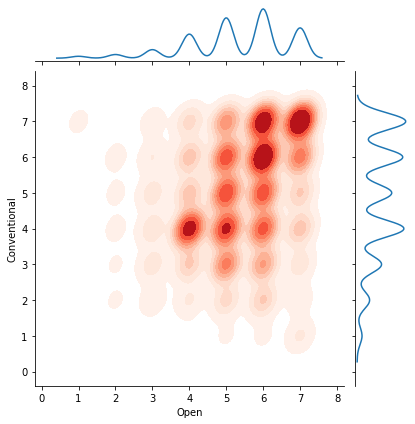

In [46]:
sns.jointplot(x='Open', y='Conventional', data=cces3, cmap='Reds', shade=True, kind='kde')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

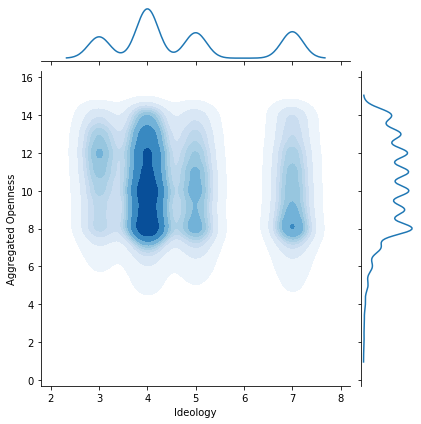

In [47]:
cces3['Aggregated Openness'] = cces3['Conventional'] + cces3['Open']
sns.jointplot(x='Ideology', y='Aggregated Openness', data=cces3, cmap='Blues', shade=True, kind='kde')

# Text Preprocessing

In [ ]:
! pip install textblob
! pip install vaderSentiment
! pip install wordcloud
import nltk, string
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [49]:
text = 'That\'s why the NATO Alliance was created: to secure peace and stability in Europe after World War Two. The United States is a member, along with 29 other nations.'

lowered = text.lower()
no_num = ''.join([word for word in lowered if not word.isdigit()])
no_punc = no_punc = no_num.translate(str.maketrans('', '', string.punctuation))
tokens = nltk.tokenize.word_tokenize(no_punc)
stopwords = set(nltk.corpus.stopwords.words('english'))
cleaned = [word for word in tokens if not word in stopwords]
print(cleaned)

['thats', 'nato', 'alliance', 'created', 'secure', 'peace', 'stability', 'europe', 'world', 'war', 'two', 'united', 'states', 'member', 'along', 'nations']


In [50]:
text = 'That\'s why the NATO Alliance was created: to secure peace and stability in Europe after World War Two. The United States is a member, along with 29 other nations.'
blob = TextBlob(text)
print(blob.ngrams(n=2))
print(blob.sentiment)

[WordList(['That', "'s"]), WordList(["'s", 'why']), WordList(['why', 'the']), WordList(['the', 'NATO']), WordList(['NATO', 'Alliance']), WordList(['Alliance', 'was']), WordList(['was', 'created']), WordList(['created', 'to']), WordList(['to', 'secure']), WordList(['secure', 'peace']), WordList(['peace', 'and']), WordList(['and', 'stability']), WordList(['stability', 'in']), WordList(['in', 'Europe']), WordList(['Europe', 'after']), WordList(['after', 'World']), WordList(['World', 'War']), WordList(['War', 'Two']), WordList(['Two', 'The']), WordList(['The', 'United']), WordList(['United', 'States']), WordList(['States', 'is']), WordList(['is', 'a']), WordList(['a', 'member']), WordList(['member', 'along']), WordList(['along', 'with']), WordList(['with', '29']), WordList(['29', 'other']), WordList(['other', 'nations'])]
Sentiment(polarity=0.1375, subjectivity=0.4875)


In [51]:
analyzer = SentimentIntensityAnalyzer()
text1 ='That\'s whythe NATO Alliance was created: to secure peace and stability in Europe after World War Two.'
vader1 = analyzer.polarity_scores(text1)
print(vader1)
text2 = 'One way to fight inflation is to drive down wages and make Americans poorer.'
vader2 = analyzer.polarity_scores(text2)
print(vader2)

{'neg': 0.157, 'neu': 0.524, 'pos': 0.319, 'compound': 0.4588}
{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'compound': -0.6249}


In [56]:
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text
def remove_stopwords(tokens):
  stop_words = set(stopwords)
  return [word for word in tokens if not word in stop_words]

In [57]:
dat = pd.read_csv('/content/drive/MyDrive/Data/state_of_the_union_texts.csv')
# Lowercase
dat['Text2'] = dat['Text'].str.lower()
# Numbers
dat['Text2'] = dat['Text2'].str.replace('\d+', '')
dat['Text3'] = dat['Text2'].apply(remove_punctuations).apply(nltk.word_tokenize).apply(remove_stopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [58]:
# Looking at polarity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
dat['cleanstring'] = dat['Text3'].astype(str)
dat['Subjectivity'] = dat['cleanstring'].apply(get_subjectivity)
dat['Polarity'] = dat['cleanstring'].apply(get_polarity)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


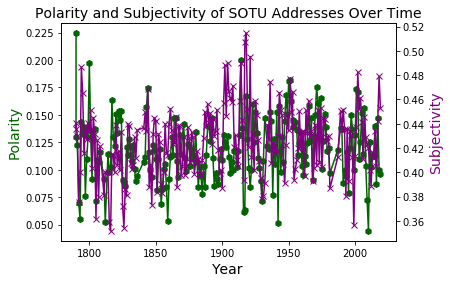

In [59]:
# Two y-axes with Year as x-axis
# Create figure and axis objects with subplots()
fig,ax = plt.subplots()
# Create plot
ax.plot(dat['Year'], dat['Polarity'], color='darkgreen', marker='h')
# Set x-axis label
ax.set_xlabel('Year', fontsize=14)
# Set y-axis label
ax.set_ylabel('Polarity', color='darkgreen', fontsize=14)
# Second y-axis
ax2 = ax.twinx()
# Plot with different y-axis
ax2.plot(dat['Year'], dat['Subjectivity'], color='purple', marker='x')
# Set second y-axis label
ax2.set_ylabel('Subjectivity', color='purple', fontsize=14)
# Set plt.title and plt.show()
plt.title('Polarity and Subjectivity of SOTU Addresses Over Time', fontsize=14)
plt.show()

In [60]:
def gen_wordcloud(text):
  # Lowercase text
  text = text.lower()
  # If you would like to update and add stopwords:
  stopwords = set(STOPWORDS)
  stopwords.update(["u", "o"])
  wordcloud = WordCloud(stopwords = STOPWORDS, collocations = False, background_color = 'white', max_words=150).generate(text)
  # Plot the wordcloud object
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('WordCloud of SOTU')
  plt.show()

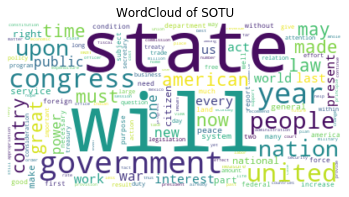

In [61]:
# Joining the unprocessed speech
sotu_text = ' '.join(speech for speech in (dat['Text']))
gen_wordcloud(sotu_text)

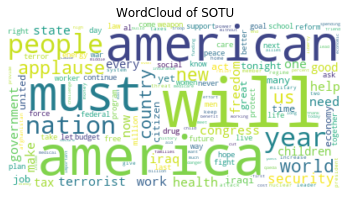

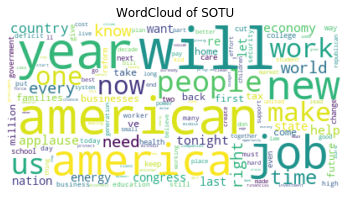

In [62]:
gwb_text = ' '.join(speech for speech in (dat.loc[dat['President'] == 'George W. Bush', 'Text']))
bo_text = ' '.join(speech for speech in (dat.loc[dat['President'] == 'Barack Obama', 'Text']))
gen_wordcloud(gwb_text)
gen_wordcloud(bo_text)

# Voting Ideology

Nominal Three-Step Estimation (NOMINATE) is a scaling method to represent members of Congress on a spatial map. 

-0.1725


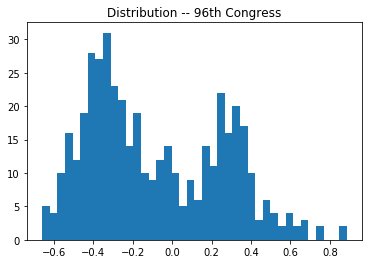

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

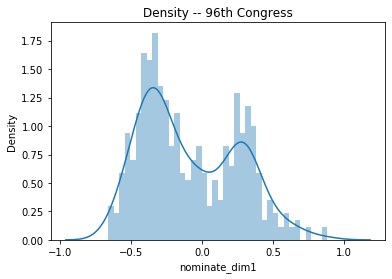

In [64]:
all = pd.read_csv("/content/drive/MyDrive/Data/Hall_members.csv")
#select 96th congress
df96 = all.loc[all["congress"] == 96]
df96 = df96.iloc[:, [0, 1, 2, 3, 4, 5, 6, 9, 13]]
# Only keep House members
df_house96 = df96.loc[df96['chamber'] < 'I']
ch96_median = df_house96['nominate_dim1'].median()
print(ch96_median)
# Histogram
plt.hist(df_house96['nominate_dim1'], bins = 40)
plt.title('Distribution -- 96th Congress')
plt.show()
# Density plot
sns.distplot(df_house96['nominate_dim1'],
  hist = True,
  kde = True,
  bins = 40)
plt.title('Density -- 96th Congress')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

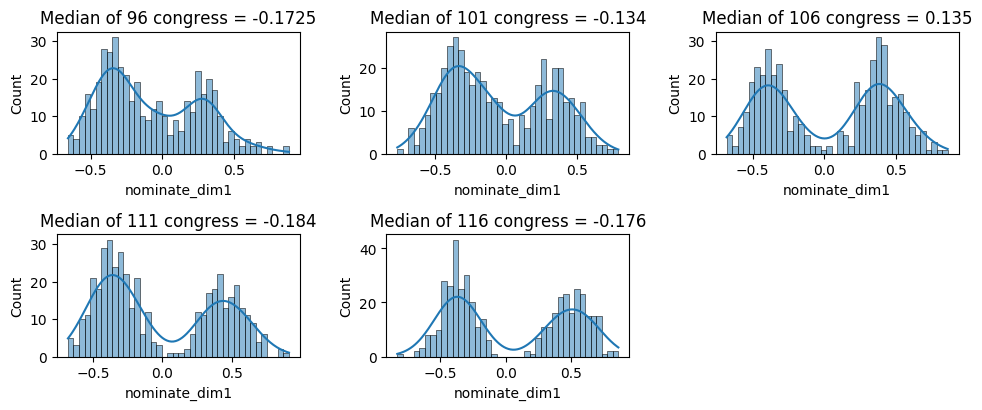

In [70]:
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
for i, congress in enumerate([96, 101, 106, 111, 116]):
  df = all.loc[all["congress"] == congress]
  df = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 9, 13]]
  dfhouse = df.loc[df['chamber'] < 'I']
  ax = fig.add_subplot(10, 3, i + 1)
  sns.histplot(dfhouse['nominate_dim1'],
    kde=True,
    bins=40,
    ax=ax)
  plt.title(f"Median of {congress} congress = {dfhouse['nominate_dim1'].median()}")
plt.show()